In [65]:
import pandas as pd



# **Load and Summarize the Dataset**

In [66]:
# Step 1: Load the Dataset
file_path = 'Mall_Customers.csv'  # Update this to the correct path if needed
data = pd.read_csv(file_path)



In [67]:
# Step 3: Display the First Few Rows of the Dataset
print("\nFirst Few Rows of the Dataset:")
data.head()



First Few Rows of the Dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
data.drop(columns = ["CustomerID"], inplace = True)

In [69]:
# Step 2: Inspect the Dataset Structure
print("Dataset Structure:")
print(data.info())  # Provides data types and non-null counts



Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None


In [70]:
# Step 4: Check for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())  # Shows the count of missing values in each column



Missing Values:
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [71]:
# Confirm no duplicates
print(data.duplicated().sum())

0


In [72]:

# Step 5: Basic Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())  # Provides basic statistics for numerical columns



Descriptive Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


# **Exploratory Data Analysis**

In [73]:
from sklearn.preprocessing import LabelEncoder
# Step 2: Apply Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])


In [74]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


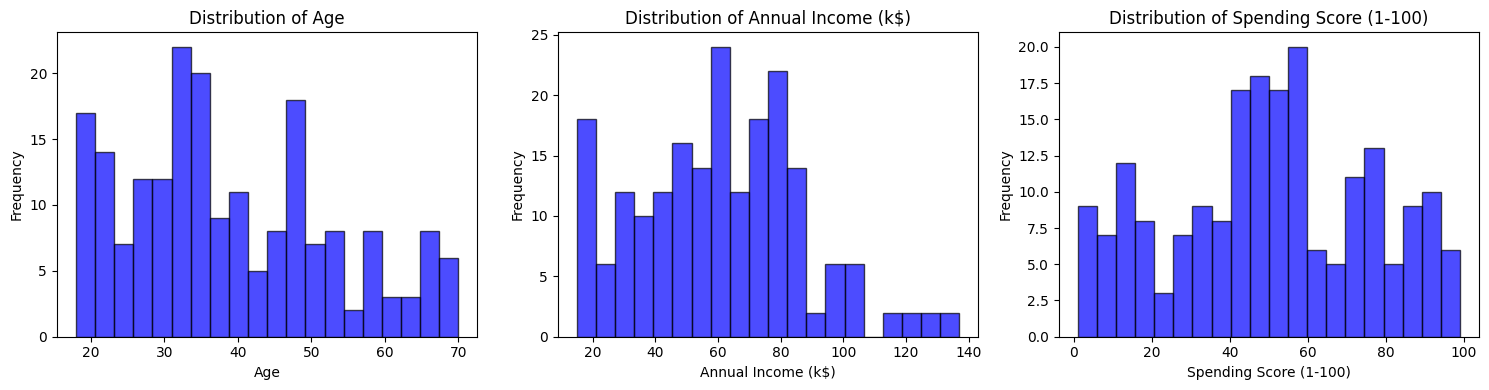

In [75]:
import matplotlib.pyplot as plt
import math

# List of numerical columns in the dataset
numerical_columns =  ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Calculate the number of subplots required based on the number of numerical columns
num_columns = len(numerical_columns)
num_rows = math.ceil(num_columns / 3)  # 3 columns per row (adjust if needed)

# Create a figure with subplots
plt.figure(figsize=(15, num_rows * 4))  # Adjust the figure size based on number of rows

# Plotting each numerical feature as a histogram
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Dynamically set the grid for subplots
    plt.hist(data[column], bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to ensure that the plots don't overlap
plt.tight_layout()

# Display the plots
plt.show()


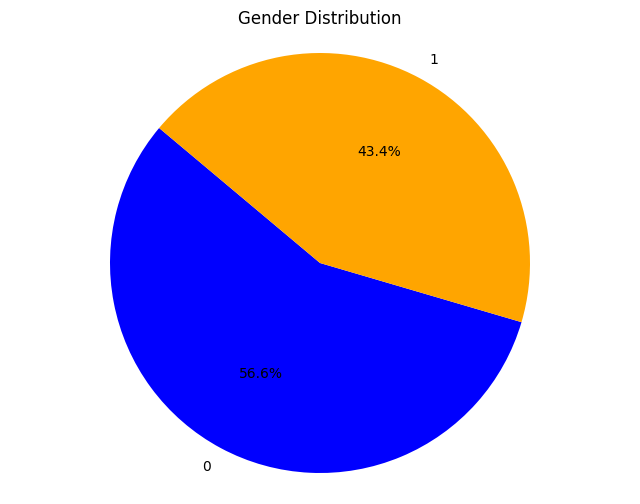

In [97]:
# Pie chart for 'Gender' column
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


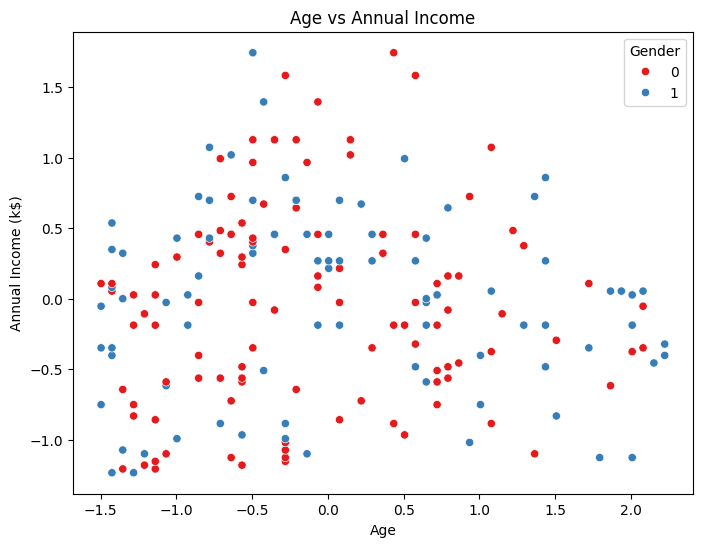

In [98]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue='Gender', palette='Set1')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


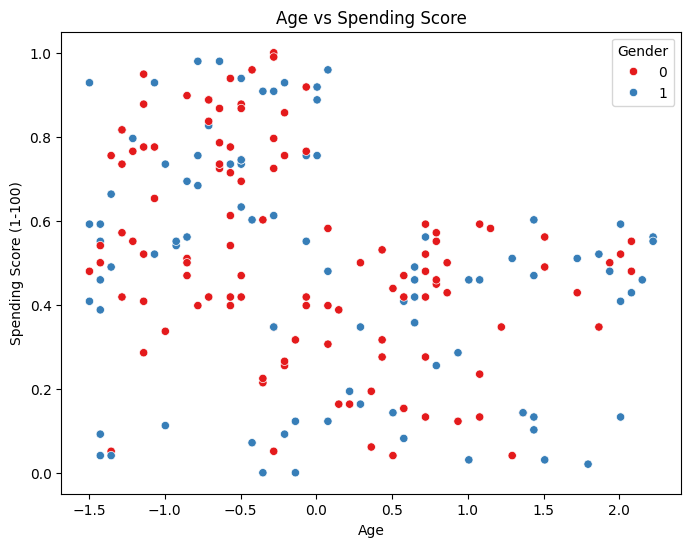

In [99]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data, hue='Gender', palette='Set1')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


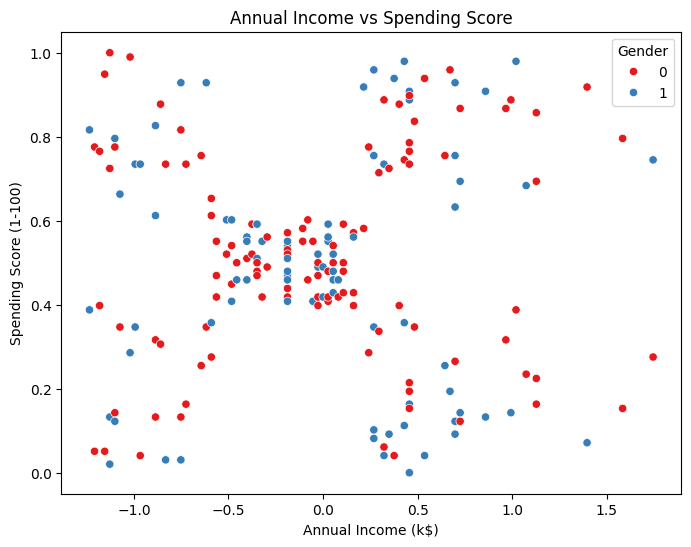

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Gender', palette='Set1')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


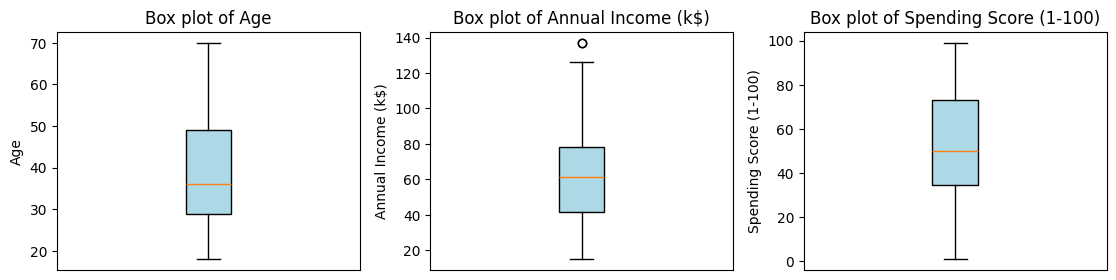

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns


# Define the numerical columns
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# Create boxplot for each numerical feature
plt.figure(figsize=(15, 8))
for i,numerical_columns in enumerate(numerical_columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(data[numerical_columns],vert=True,patch_artist=True,boxprops=dict(facecolor='lightblue'))
    plt.title(f"Box plot of {numerical_columns}")
    plt.ylabel(numerical_columns)
    plt.xticks([])
plt.tight_layout()
plt.show()



In [81]:
# Remove outliers using IQR method (considering only numeric columns)
def remove_outliers(data):
    # Select only numeric columns for outlier removal
    numeric_data = data.select_dtypes(include=['float64', 'int64'])

    # Calculate IQR for each numerical column
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers for each column
    data_no_outliers = data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]

    return data_no_outliers

# Apply the outlier removal function
data_no_outliers = remove_outliers(data)

# Check the shape before and after outlier removal
print("Before outlier removal:", data.shape)
print("After outlier removal:", data_no_outliers.shape)


Before outlier removal: (200, 4)
After outlier removal: (198, 4)


In [82]:
data=data_no_outliers

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Apply the appropriate scaling directly to replace the original columns
data['Age'] = standard_scaler.fit_transform(data[['Age']])
data['Annual Income (k$)'] = robust_scaler.fit_transform(data[['Annual Income (k$)']])
data['Spending Score (1-100)'] = minmax_scaler.fit_transform(data[['Spending Score (1-100)']])



In [84]:
# Check the data after replacing original columns with scaled versions
print(data.head())


   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0       1 -1.425414           -1.234899                0.387755
1       1 -1.282367           -1.234899                0.816327
2       0 -1.353890           -1.208054                0.051020
3       0 -1.139319           -1.208054                0.775510
4       0 -0.567131           -1.181208                0.397959


In [85]:
# Verify the scaling of the dataset
data.describe()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,198.000000,1.980000e+02,198.000000,198.000000
mean,0.434343,1.435440e-16,-0.032540,0.502010
std,0.496927,1.002535e+00,0.677510,0.262723
min,0.000000,-1.496937e+00,-1.234899,0.000000
25%,0.000000,-7.638208e-01,-0.550336,0.346939
50%,0.000000,-2.095134e-01,0.000000,0.500000
75%,1.000000,7.202926e-01,0.449664,0.732143
max,1.000000,2.222287e+00,1.744966,1.000000


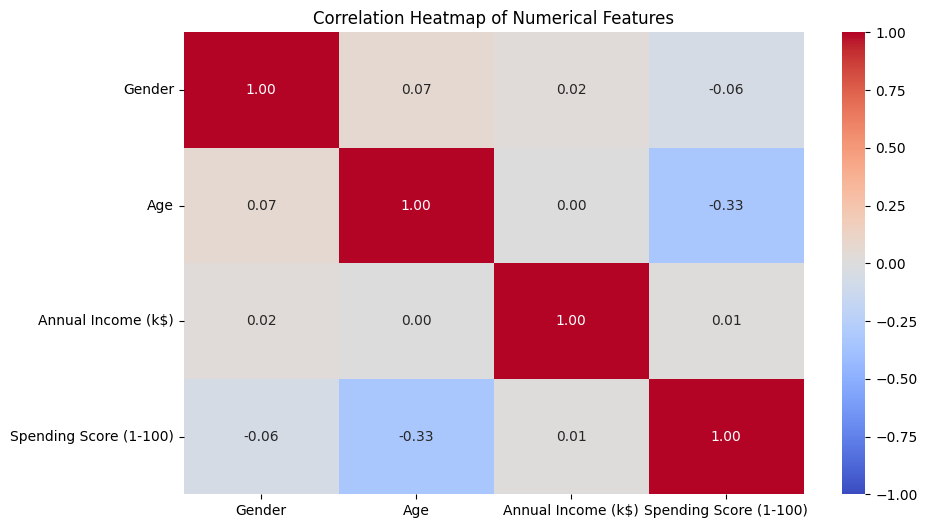

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))  # You can adjust the size of the figure
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, vmin=-1, vmax=1)

# Set title and display the plot
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [87]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

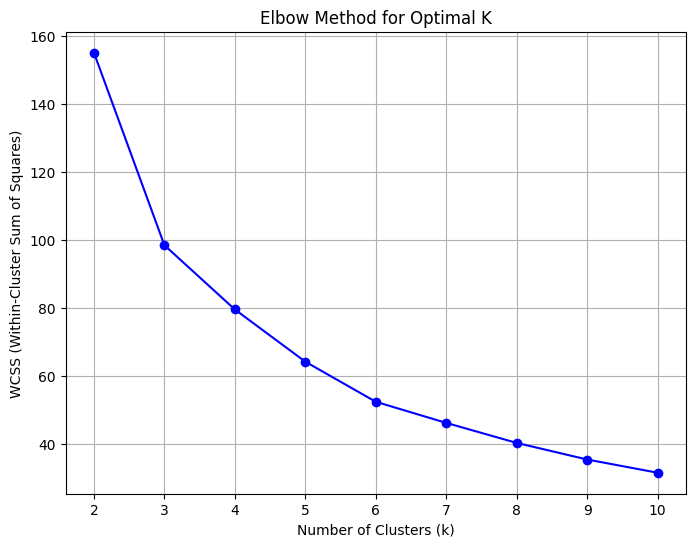

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Selecting features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Step 1: Elbow Method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for k in range(2, 11):  # Testing k from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()



In [89]:
# Print all the Elbow values (WCSS) for each k
for k, wcss_value in zip(range(2, 11), wcss):
    print(f"K = {k}, WCSS = {wcss_value:.2f}")



K = 2, WCSS = 154.97
K = 3, WCSS = 98.37
K = 4, WCSS = 79.48
K = 5, WCSS = 64.12
K = 6, WCSS = 52.34
K = 7, WCSS = 46.13
K = 8, WCSS = 40.25
K = 9, WCSS = 35.37
K = 10, WCSS = 31.48


In [90]:
# Step 2: Silhouette Score for different K values
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(features)
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

# Print Silhouette Scores for each k
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"K = {k}, Silhouette Score = {score:.2f}")


K = 2, Silhouette Score = 0.43
K = 3, Silhouette Score = 0.41
K = 4, Silhouette Score = 0.38
K = 5, Silhouette Score = 0.36
K = 6, Silhouette Score = 0.38
K = 7, Silhouette Score = 0.36
K = 8, Silhouette Score = 0.38
K = 9, Silhouette Score = 0.37
K = 10, Silhouette Score = 0.38


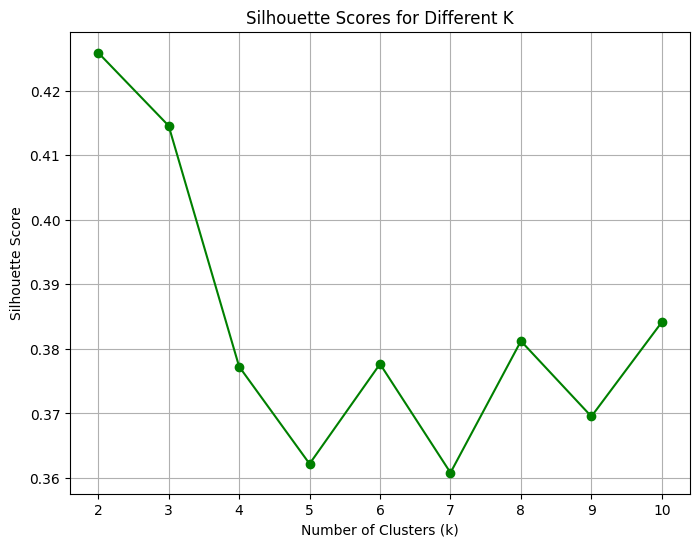

In [91]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='g')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [92]:
# Calculate the change in WCSS and find the maximum difference to detect the "elbow"
wcss_diff = np.diff(wcss)
optimal_k_elbow = np.argmin(wcss_diff) + 2  # Adding 2 because the diff starts at k=2

# Best K based on Silhouette Score
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 for correct index

# Step 4: Print Best K values from both methods
print(f"\nBest number of clusters based on Elbow Method: {optimal_k_elbow}")
print(f"Best number of clusters based on Silhouette Score: {optimal_k_silhouette}")


Best number of clusters based on Elbow Method: 2
Best number of clusters based on Silhouette Score: 2


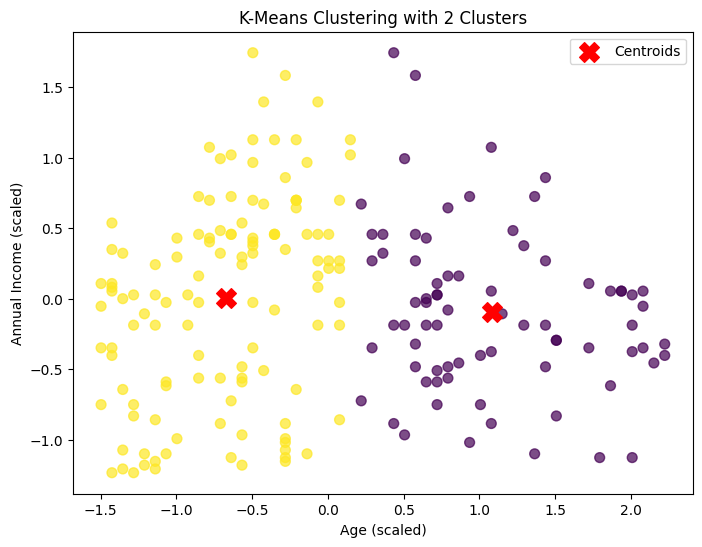

Silhouette Score for 2 clusters: 0.43


In [93]:



# Step 4: Apply K-Means with the optimal number of clusters (based on the Elbow or Silhouette Method)
optimal_k = optimal_k_silhouette  # You can choose the value based on either method

# Fit K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
labels = kmeans.fit_predict(features)
centroids = kmeans.cluster_centers_

# Step 5: Visualize the Clusters and Centroids
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (scaled)')
plt.legend()
plt.show()

# Print the silhouette score and WCSS for optimal k
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_scores[optimal_k_silhouette - 2]:.2f}")


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as ss

# Assuming 'data' is the DataFrame containing your dataset
# Prepare the dataset: Age as the independent variable and Spending Score as the target variable
X = data[['Age']]  # Predictor (independent) variable
y = data['Spending Score (1-100)']  # Target (dependent) variable

# Step 1: Fit the Linear Regression Model (Least Squares Fitting)
model = LinearRegression()
model.fit(X, y)

# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make predictions using the fitted model
y_pred = model.predict(X)

# Print the linear regression equation
print(f"Linear regression equation: y = {slope:.2f}x + {intercept:.2f}")

# Step 2: Evaluate the Model
mse = mean_squared_error(y, y_pred)  # Mean Squared Error
r2 = r2_score(y, y_pred)  # R-squared

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")




Linear regression equation: y = -0.09x + 0.50
Mean Squared Error (MSE): 0.0612
R-squared (R²): 0.1085


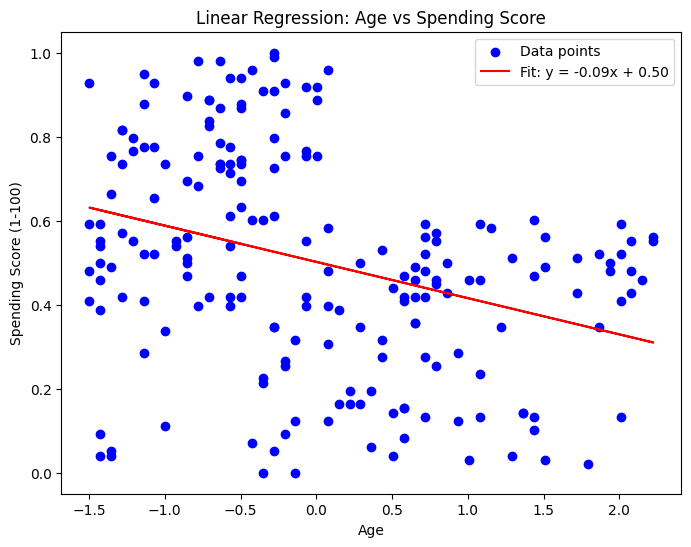

In [95]:
# Step 3: Visualize the Fit
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.title('Linear Regression: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [96]:

# Step 4: Optional - Chi-Square (χ²) Goodness of Fit Test
chi_squared = np.sum((y - y_pred)**2 / y_pred)
degrees_of_freedom = len(X) - 2  # Degrees of freedom: N - p (2 parameters: slope and intercept)
chi_squared_r = chi_squared / degrees_of_freedom  # Reduced Chi-Square

print(f"Chi-Square (χ²): {chi_squared:.4f}")
print(f"Reduced Chi-Square (χ²_r): {chi_squared_r:.4f}")

Chi-Square (χ²): 24.0005
Reduced Chi-Square (χ²_r): 0.1225
